Results of the seventh place code's prediction and corresponding feature importance. Prior to other stuff, see if we can extract any info from here. 

In [1]:
import os
import gc
import re
import time
import numpy as np
import pandas as pd
from contextlib import contextmanager
import multiprocessing as mp
from functools import partial
from scipy.stats import kurtosis, iqr, skew
from lightgbm import LGBMClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
feature_importances = pd.read_csv('feature_importance_model2_04.csv')

In [6]:
feature_importances.index = feature_importances.feature

<AxesSubplot:xlabel='feature'>

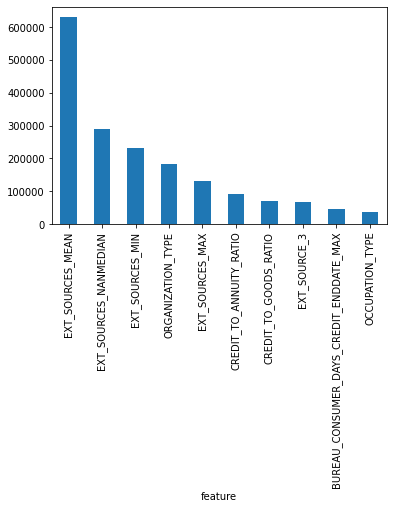

In [8]:
feature_importances['gain'].head(n=10).plot(kind='bar')

<AxesSubplot:xlabel='feature'>

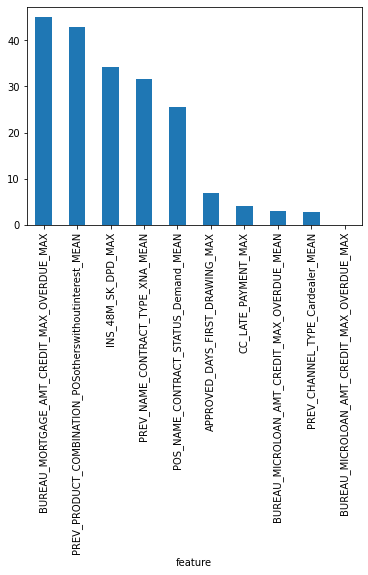

In [9]:
feature_importances['gain'].tail(n=10).plot(kind='bar')

perhaps encouragingly, external sources is a part of the actual application, so it is good that it is weighted heavily, and since bureau is related to previous loans from other companies, it is good that it is not that important. That would be a theory to start with, but not the actual for sure explanation. Somewhere to start though. 



Plenty of other RDS type questions to answer, such as fairness, 

<AxesSubplot:ylabel='Frequency'>

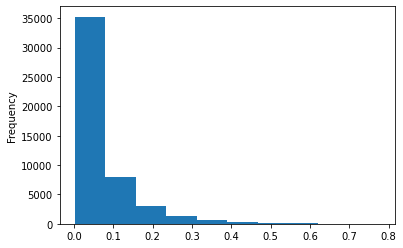

In [14]:

pd.read_csv('submission_model2_04.csv')['TARGET'].plot(kind='hist')


In [11]:
pd.read_csv('../../../home-credit-default-risk/HomeCredit_columns_description.csv')

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [ ]:
privileged_sex = np.where(categorical_names['Victim Sex'] == 'Male')[0]
privileged_race = np.where(categorical_names['Victim Race'] == 'White')[0]